# Outline:

*   SVM Intuition
*   SVM with Linear Dataset

# SVM Intuition

### Case 1: Correct Classification
  what is the best classifier?

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_21.png>

**The best hyper-plane is the one that separates the two classes better. Therefore, B is the best hyperplane**

### Case 2: Maximizing the Margin
**These three hyper-planes separate the two classes, but which of them is the best one?**

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_3.png>

**We care about maximizing the distances between the nearest data point of either class and hyper-plane. This distance between the hyper-plane and the nearest data point of each class is called margin**

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_4.png>

### Case 3: Outliers

<img src=https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_71.png>

# Loading needed libraries

In [25]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison


from sklearn.svm import SVC

# SVM with linear dataset

### Loading the data

In [26]:
iris = datasets.load_iris()
x = iris.data[0:100, [0, 2]]
y = iris.target[0:100]
y[y == 0] = -1

x, y = shuffle_arrays_unison(arrays= [x, y], random_seed= 42)

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

x_train, y_train = x[:80], y[:80]
x_test, y_test = x[80:], y[80:]

### Implementing the classifier from scratch

In [27]:
class svm_hard_margin:

  weights = []
  bias = 0

  def fit(self, x, y, learning_rate, epochs):
    n_samples, n_features = x.shape
    self.weights = np.zeros(n_features)

    for epoch in range(1, epochs + 1):
        for j in range(n_samples):
            condition = y[j] * (np.dot(x[j], self.weights) + self.bias) >= 1
            if not condition:
                # Misclassification, update weights and bias
                self.weights += learning_rate * (x[j] * y[j] - 2 * 1/epoch * self.weights)
                self.bias += learning_rate * y[j]

  def predict(self, x):
    predictions = np.dot(x, self.weights) + self.bias
    predictions = np.sign(predictions)
    return predictions

In [28]:
svm_classifier = svm_hard_margin()
svm_classifier.fit(x_train, y_train, 0.01, 1000)

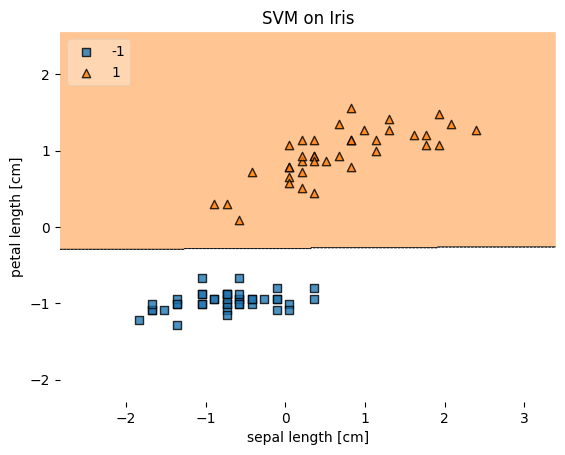

In [29]:
# Plotting decision regions
plot_decision_regions(x_train, y_train, clf=svm_classifier, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

### the built-in sklearn SVM algorithm

In [43]:
svm = SVC(C=0.5, kernel='linear')
svm.fit(x_train, y_train)

SVC(C=0.5, kernel='linear')

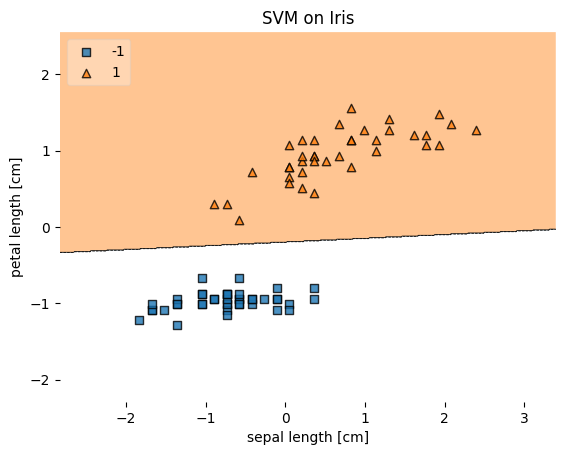

In [44]:
# Plotting decision regions
plot_decision_regions(x_train, y_train, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

### Evaluating the two models

In [45]:
predictions1 = svm.predict(x_test)
predictions2 = svm_classifier.predict(x_test)
print('The Accuracy of the SVM built-in classifier is ', accuracy_score(predictions1, y_test))
print('The Accuracy of the SVM from scratch classifier is ', accuracy_score(predictions2, y_test))


The Accuracy of the SVM built-in classifier is  1.0
The Accuracy of the SVM from scratch classifier is  1.0
